In [192]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline

# read datasets

In [193]:
# read datasets
train_data = pd.read_csv('../Data/Titanic/train.csv')
test_data = pd.read_csv('../Data/Titanic/test.csv')
print(train_data.columns)

train_data

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# show stats of train data

In [194]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [195]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [196]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [197]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# prepocess data

In [199]:
train_df = train_data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

# add a new column "Family" which equals SibSp + Parch, pretending overfitting
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
train_df = train_df.drop(columns=['SibSp', 'Parch'])

# fill Na with mean(Age) and value with max frequency(Embarked)
emb_counts = dict(train_df['Embarked'].value_counts())
na_cols = [col for col in train_df.columns if any(train_df[col].isna())]
print(emb_counts)
print(na_cols)

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df['Embarked'] = train_df['Embarked'].fillna(max(emb_counts)) # S
print(train_df.isna().any().any())

stoi = {}   # dict of dict :)
for col in train_df.select_dtypes(include=['O']).columns:
    stoi[col] = {s:i for i, s in enumerate(list(sorted(set(train_df[col]))))}
    train_df[col] = list(stoi[col][p] for p in train_df[col].to_numpy())

print(stoi)
train_df.info()

{'S': 644, 'C': 168, 'Q': 77}
['Age', 'Embarked']
False
{'Sex': {'female': 0, 'male': 1}, 'Embarked': {'C': 0, 'Q': 1, 'S': 2}}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int64  
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


# train model and tuning parameters(boring)

In [200]:
# translate Dataframe to numpy 
X, Y = train_df.drop(columns=['Survived']).to_numpy(), train_df['Survived'].to_numpy()
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

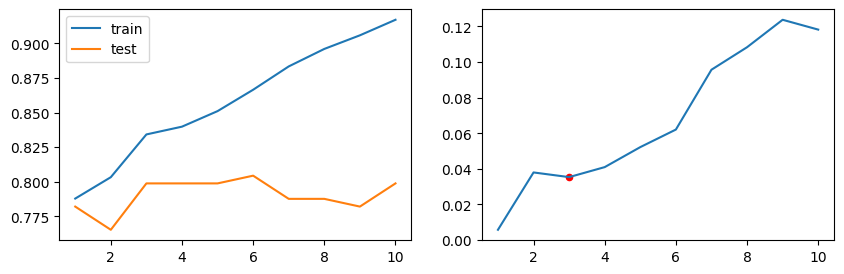

gini -> max_depth 3, test score 0.7988826815642458


In [201]:
# select the best parameters (tune max_depth and criterion)
# we can get max_depth = 3
train_score = []
test_score = []

for i in range(10):
    clf = tree.DecisionTreeClassifier(
        max_depth=i+1,
        criterion='gini'
    )
    clf = clf.fit(train_X, train_Y)
    train_score.append(clf.score(train_X, train_Y))
    test_score.append(clf.score(test_X, test_Y))
    
dif = [a - b for a, b in zip(train_score, test_score)]

plt.subplots(1, 2, figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), train_score, label='train')
plt.plot(range(1, 11), test_score, label='test')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), dif)
plt.scatter(dif.index(min(dif[2:])) + 1, min(dif[2:]), s=20, c='r')
plt.show()

print(f'gini -> max_depth {dif.index(min(dif[2:])) + 1}, test score {test_score[dif.index(min(dif[2:]))]}')

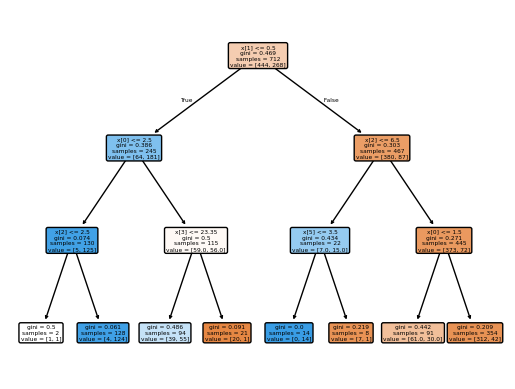

<Figure size 10000x10000 with 0 Axes>

In [202]:
clf = tree.DecisionTreeClassifier(
        max_depth=3,
        criterion='gini'
    )
clf = clf.fit(train_X, train_Y)
tree.plot_tree(clf, rounded=True, filled=True)
plt.figure(figsize=(100, 100))
plt.show()

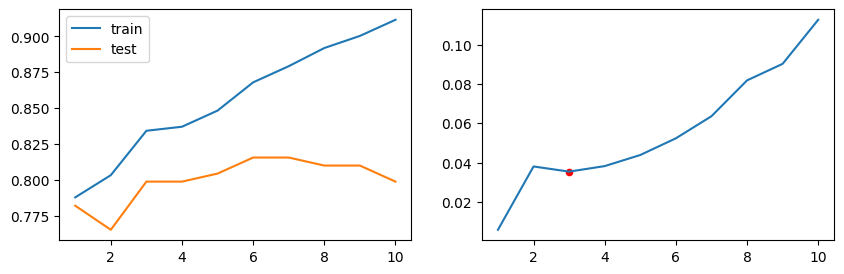

entropy -> max_depth 3, test score 0.7988826815642458


In [203]:
# select the best parameters (tune max_depth and criterion)
# we can get max_depth = 3
train_score = []
test_score = []

for i in range(10):
    clf = tree.DecisionTreeClassifier(
        max_depth=i+1,
        criterion='entropy'
    )
    clf = clf.fit(train_X, train_Y)
    train_score.append(clf.score(train_X, train_Y))
    test_score.append(clf.score(test_X, test_Y))
    
dif = [a - b for a, b in zip(train_score, test_score)]

plt.subplots(1, 2, figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), train_score, label='train')
plt.plot(range(1, 11), test_score, label='test')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), dif)
plt.scatter(dif.index(min(dif[2:])) + 1, min(dif[2:]), s=20, c='r')
plt.show()

print(f'entropy -> max_depth {dif.index(min(dif[2:])) + 1}, test score {test_score[dif.index(min(dif[2:]))]}')

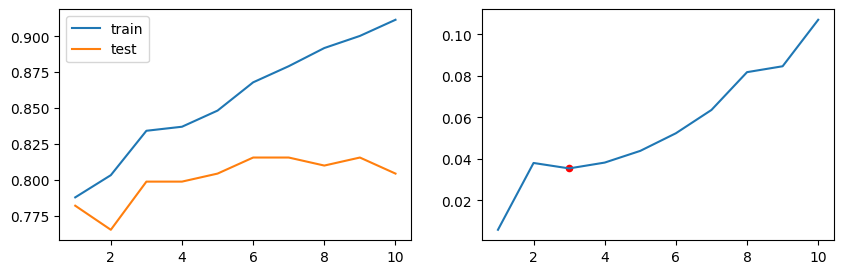

In [204]:
# select the best parameters (tune max_depth and criterion)
train_score = []
test_score = []

for i in range(10):
    clf = tree.DecisionTreeClassifier(
        max_depth=i+1,
        criterion='entropy'
    )
    clf = clf.fit(train_X, train_Y)
    train_score.append(clf.score(train_X, train_Y))
    test_score.append(clf.score(test_X, test_Y))
    
dif = [a - b for a, b in zip(train_score, test_score)]

plt.subplots(1, 2, figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), train_score, label='train')
plt.plot(range(1, 11), test_score, label='test')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), dif)
plt.scatter(dif.index(min(dif[2:])) + 1, min(dif[2:]), s=20, c='r')
plt.show()

In [205]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(X, Y, test_size=0.2, random_state=20)
clf = tree.DecisionTreeClassifier(
    max_depth=3,
    criterion='entropy',
    min_impurity_decrease=0.1,
)
clf = clf.fit(train_X, train_Y)
print(f"score: {clf.score(test_X, test_Y)}")

score: 0.8324022346368715


# Predict and save results

In [206]:
# do the same work to test_data
test_df = test_data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

# add a new column "Family" which equals SibSp + Parch, pretending overfitting
test_df['Family'] = test_df['SibSp'] + test_df['Parch']
test_df = test_df.drop(columns=['SibSp', 'Parch'])

# fill Na with mean(Age) and value with max frequency(Embarked)
emb_counts = dict(test_df['Embarked'].value_counts())
na_cols = [col for col in test_df.columns if any(test_df[col].isna())]
print(emb_counts)
print(na_cols)

test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
test_df['Embarked'] = test_df['Embarked'].fillna(max(emb_counts)) # S
print(train_df.isna().any().any())

stoi = {}   # dict of dict :)
for col in test_df.select_dtypes(include=['O']).columns:
    stoi[col] = {s:i for i, s in enumerate(list(sorted(set(test_df[col]))))}
    test_df[col] = list(stoi[col][p] for p in test_df[col].to_numpy())

print(stoi)

test_df.info()

{'S': 270, 'C': 102, 'Q': 46}
['Age', 'Fare']
False
{'Sex': {'female': 0, 'male': 1}, 'Embarked': {'C': 0, 'Q': 1, 'S': 2}}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    int64  
 5   Family    418 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [215]:
predict_survives = clf.predict(test_df.to_numpy())
predict_survives_df = pd.DataFrame(predict_survives, columns=['Survived'])
result = pd.concat([test_data[['PassengerId']], predict_survives_df], axis=1)

# 保存为CSV文件，不包含索引
result.to_csv('../Data/Titanic/result.csv', index=False)